In [42]:
#赤いwarmを消すため
import warnings
warnings.filterwarnings("ignore")

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

# データの読み込み 
train_df = pd.read_csv("./train.csv") #pandasのDataFrame型
test_df = pd.read_csv("./test.csv")


180921.19589041095
163000.0


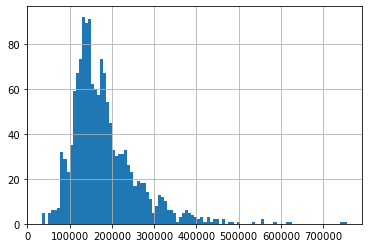

In [44]:
# 目的変数 (販売価格) の分析 
#分布
train_df["SalePrice"].hist(bins=100) #binは柱の数
print(train_df["SalePrice"].mean()) # 平均値
print(train_df["SalePrice"].median()) # 中央値

<AxesSubplot:>

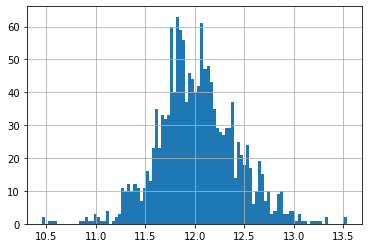

In [45]:
# 対数変換した分布 
np.log( train_df["SalePrice"] ).hist(bins=100)

In [46]:
# BsmtCond (地下室概況) 別の販売価格 
train_df["SalePrice"].groupby(train_df["BsmtCond"]).mean()
#データをある変数でグループ分けて，平均値を求める．

BsmtCond
Fa    121809.533333
Gd    213599.907692
Po     64000.000000
TA    183632.620900
Name: SalePrice, dtype: float64

Text(0.5, 0, 'SalePrice')

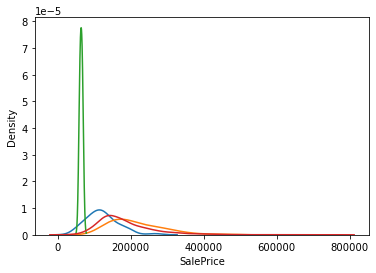

In [47]:
SP0 = train_df[ train_df["BsmtCond"] == "Fa" ]["SalePrice"] 
SP1 = train_df[ train_df["BsmtCond"] == "Gd" ]["SalePrice"] 
SP2 = train_df[ train_df["BsmtCond"] == "Po" ]["SalePrice"] 
SP3 = train_df[ train_df["BsmtCond"] == "TA" ]["SalePrice"] 


# カーネル密度推定 
import seaborn as sns 
sns.kdeplot(SP0, label="Fa") 
sns.kdeplot(SP1, label="Gd") 
sns.kdeplot(SP2, label="Po") 
sns.kdeplot(SP3, label="TA") 
#離散的な方法を正規化する方法，正規分布をとる．
plt.xlabel("SalePrice")

In [48]:
# PoolQC (プール品質) 別の販売価格 
train_df["SalePrice"].groupby(train_df["PoolQC"]).mean()

PoolQC
Ex    490000.0
Fa    215500.0
Gd    201990.0
Name: SalePrice, dtype: float64

Text(0.5, 0, 'SalePrice')

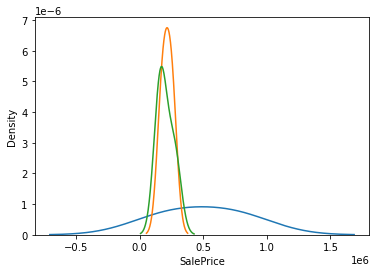

In [49]:
SP0 = train_df[ train_df["PoolQC"] == "Ex" ]["SalePrice"] 
SP1 = train_df[ train_df["PoolQC"] == "Fa" ]["SalePrice"] 
SP2 = train_df[ train_df["PoolQC"] == "Gd" ]["SalePrice"] 
sns.kdeplot(SP0, label="Ex") 
sns.kdeplot(SP1, label="Fa") 
sns.kdeplot(SP2, label="Gd") 
plt.xlabel("SalePrice")

In [50]:
#外れ値処理
# 統計量の確認 (Object型以外) 
train_df.describe().T#.T転置して，縦型になる

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

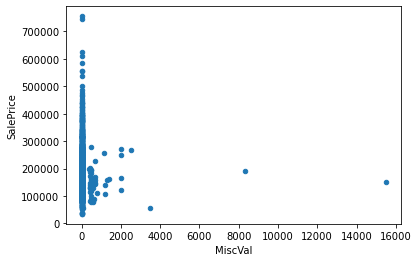

In [51]:
# 分布の確認 
train_df.plot.scatter(x="MiscVal", y="SalePrice")

In [52]:
#外れ値を削除
train_df = train_df[ train_df["MiscVal"]<3000 ]

<AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>

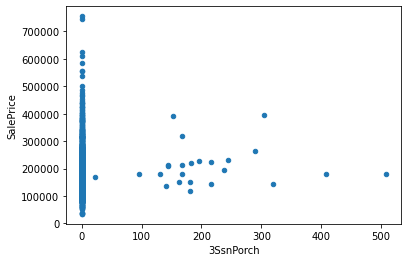

In [53]:
# 分布の確認 
train_df.plot.scatter(x="3SsnPorch", y="SalePrice")

In [54]:
#外れ値を削除
train_df = train_df[ train_df["3SsnPorch"]<100 ]

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

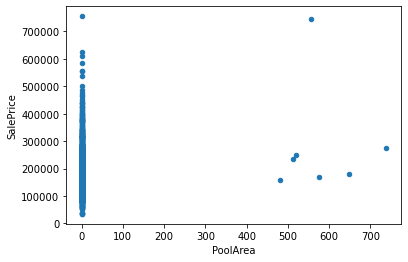

In [55]:
# 分布の確認 
train_df.plot.scatter(x="PoolArea", y="SalePrice")

In [56]:
#外れ値を削除
train_df = train_df[ train_df["PoolArea"]<100 ]

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

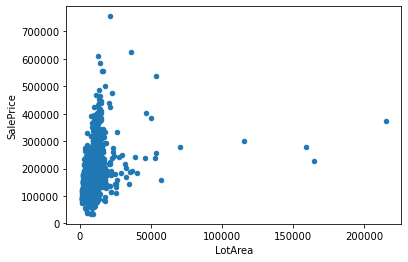

In [57]:
# 分布の確認 
train_df.plot.scatter(x="LotArea", y="SalePrice")

In [58]:
#外れ値を削除
train_df = train_df[ train_df["LotArea"]<100000 ]

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

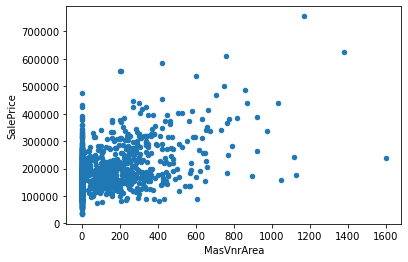

In [59]:
train_df.plot.scatter(x="MasVnrArea", y="SalePrice")

In [60]:
# 外れ値の削除（条件内のデータに限定） 
train_df = train_df[ train_df["MasVnrArea"]<1200 ]

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

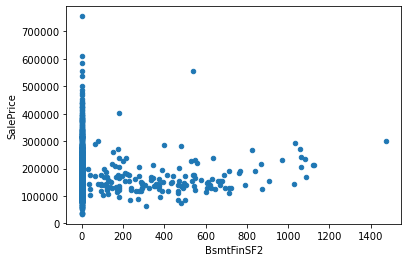

In [61]:
# 分布の確認 
train_df.plot.scatter(x="BsmtFinSF2", y="SalePrice")

In [62]:
# 外れ値の削除（条件内のデータに限定） 
train_df = train_df[ train_df["BsmtFinSF2"]<1200 ]

In [63]:
# 学習用データとテスト用データの結合 
all_df = pd.concat( [train_df, test_df], sort = False ) 
all_df = all_df.reset_index( drop=True ) 
# ダミー変数への変換 (object型 → int型) 
all_df = pd.get_dummies( all_df ) 
# 欠損値を平均値で埋める (object型以外) 
all_df2 = all_df.fillna( all_df.mean() ) 
# テストの目的変数を欠損値NaNに戻す
all_df2["SalePrice"] = all_df["SalePrice"]

In [64]:
all_df2["TotalSF"] = all_df2["TotalBsmtSF"] + all_df2["1stFlrSF"] + all_df2["2ndFlrSF"]

<AxesSubplot:xlabel='TotalSF', ylabel='SalePrice'>

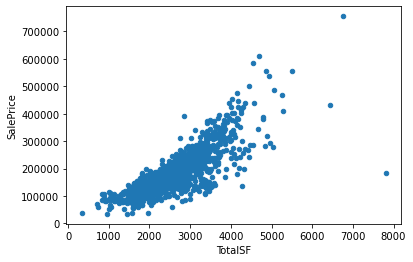

In [65]:
# 分布の確認 
all_df2.plot.scatter(x="TotalSF", y="SalePrice")

In [66]:
# 外れ値の削除（条件内のデータに限定） 
all_df2 = all_df2[ 
( all_df2["TotalSF"]<7000 ) |
( all_df2["SalePrice"].isnull() ) 
]
#テストデータも含まれているので，
#orでSalePriceはNaN(Not a Number)であることで
#test dataを残している．

In [67]:
# 再び，trainとtestに戻す 
train_df_2 = all_df2[ ~all_df2["SalePrice"].isna() ] #~ = !　Notの意味
test_df_2 = all_df2[ all_df2["SalePrice"].isna() ] 
# 説明変数と目的変数の分離 (列を削除) 
train_X = train_df_2.drop( ["SalePrice", "Id"], axis=1 ) 
test_X = test_df_2.drop( ["SalePrice", "Id"], axis=1 )
train_Y = train_df_2["SalePrice"]

In [68]:
# 機械学習の利用 (ランダムフォレスト) 
from sklearn.ensemble import RandomForestRegressor

# 学習の設定 (木の数, 評価関数, 乱数の種) 
model = RandomForestRegressor( n_estimators=500, criterion='mse', 
 max_depth = 10, random_state=1126 )

In [69]:
# スライド4ページの知見より，販売価格にlogを施す【New】
train_logY = np.log( train_Y )

In [70]:
# CV法（クロスバリデーション） 
from sklearn.model_selection import cross_val_score 
X = train_X # 説明変数
Y = train_logY # 目的変数

scores = cross_val_score( model, X, Y, cv=4 ) # cv: 学習データの分割数
valid_score = np.mean( scores ) # 汎化誤差 
print( valid_score )

0.8750455897257992


In [71]:
# ハイパーPの最適化 (CV法＋グリッドサーチ） 
from sklearn.model_selection import cross_val_score 
X = train_X # 説明変数
Y = train_logY # 目的変数

MAX_DEPTH = [10, 20, 30, None] # グリッドサーチの候補

for depth in MAX_DEPTH: 
 model = RandomForestRegressor( n_estimators=500, 
 criterion='mse', random_state=1234, 
 max_depth = depth
 ) 
 scores = cross_val_score( model, X, Y, cv=4 ) 
 valid_score = np.mean( scores ) 
 print( valid_score )

0.875002102187692
0.8767600495009015
0.8767092483486529
0.8767092483486529


In [72]:
# 最適化された機械学習モデル（max_depth = 30） 
model = RandomForestRegressor( n_estimators=500, criterion='mse', random_state=1126, max_depth = 30 ) 
# 学習データ全体で再学習
model.fit( train_X, train_logY )

RandomForestRegressor(criterion='mse', max_depth=30, n_estimators=500,
                      random_state=1126)

In [73]:
# テスト 
pred_test_logY = model.predict(test_X) 
# logを取り外す変換【New】
pred_test_Y = np.exp( pred_test_logY )

In [74]:
# 予測結果の出力 
file = pd.read_csv("./sample_submission.csv") 
file["SalePrice"] = pred_test_Y 
file.to_csv("./submission_rf2.csv", index=False) # indexは上書きしない

In [75]:
#勾配ブースティング　(助け合い機械学習)
#それぞれのハイパーパラメータは小さくてもよい
#独立じゃないので，過学習しやすい．

# 機械学習の利用 (勾配ブースティング) 
from sklearn.ensemble import GradientBoostingRegressor
# ハイパーPの最適化 
from sklearn.model_selection import cross_val_score 
MAX_DEPTH = [1, 2, 3, 4, 5] 
X = train_X # 説明変数
Y = train_logY # 目的変数 
for depth in MAX_DEPTH: 
 model = GradientBoostingRegressor( n_estimators=500, criterion='mse', 
 random_state=1126, max_depth = depth 
 ) 
 scores = cross_val_score( model, X, Y, cv=4 ) 
 valid_score = np.mean( scores ) 
 print( valid_score )

0.9039113782081223
0.9048686046010906
0.9031256875162559
0.9029517394784634
0.894212217980146


In [76]:
# 最適化された機械学習モデル（max_depth = 3） 
model = GradientBoostingRegressor( n_estimators=500, criterion='mse', random_state=1126, max_depth = 3 ) 
# 学習データ全体で再学習
model.fit( train_X, train_logY )

GradientBoostingRegressor(criterion='mse', n_estimators=500, random_state=1126)

In [77]:
# テスト 
pred_test_logY = model.predict(test_X) 
# logを取り外す変換
pred_test_Y = np.exp( pred_test_logY ) 
# 予測結果の出力 
file = pd.read_csv("./sample_submission.csv") 
file["SalePrice"] = pred_test_Y 
file.to_csv("./submission_GB.csv", index=False)

In [78]:
model1 = RandomForestRegressor( n_estimators=500, criterion='mse', random_state=1234, max_depth = 30 ) 
model2 = RandomForestRegressor( n_estimators=500, criterion='mse', random_state=7777, max_depth = 30 ) 
model3 = GradientBoostingRegressor( n_estimators=500, criterion='mse', random_state=1234, max_depth = 3 ) 
model4 = GradientBoostingRegressor( n_estimators=500, criterion='mse', random_state=7777, max_depth = 3 ) 
# 学習
model1.fit( train_X, train_logY ) 
model2.fit( train_X, train_logY ) 
model3.fit( train_X, train_logY ) 
model4.fit( train_X, train_logY ) 
# テスト 
pred_test_logY1 = model1.predict( test_X ) 
pred_test_logY2 = model2.predict( test_X ) 
pred_test_logY3 = model3.predict( test_X ) 
pred_test_logY4 = model4.predict( test_X ) 
# logを取り外す変換 
pred_test_Y1 = np.exp( pred_test_logY1 ) 
pred_test_Y2 = np.exp( pred_test_logY2 ) 
pred_test_Y3 = np.exp( pred_test_logY3 ) 
pred_test_Y4 = np.exp( pred_test_logY4 )

In [79]:
# スタッキング (学習済みmodelを使用) 
pred_train_logY1 = model1.predict( train_X ) 
pred_train_logY2 = model2.predict( train_X ) 
pred_train_logY3 = model3.predict( train_X ) 
pred_train_logY4 = model4.predict( train_X ) 
Ens_train_logY = np.array( [pred_train_logY1, pred_train_logY2, pred_train_logY3, pred_train_logY4] ).T
print( Ens_train_logY )

[[12.24335176 12.23691769 12.23727635 12.23727635]
 [12.0866108  12.08937274 12.09537134 12.09537134]
 [12.30350414 12.30383644 12.25738974 12.25738974]
 ...
 [12.47858903 12.46957311 12.51638612 12.51638612]
 [11.84297251 11.84438977 11.84234744 11.84234744]
 [11.90339918 11.90792159 11.86582888 11.86582888]]


In [80]:
# 重回帰モデル 
from sklearn import linear_model 
model_boss = linear_model.LinearRegression() 
X = Ens_train_logY # 説明変数
Y = train_logY # 目的変数
model_boss.fit( X, Y )

LinearRegression()

In [81]:
# 子分の予測 
pred_test_logY1 = model1.predict( test_X ) 
pred_test_logY2 = model2.predict( test_X ) 
pred_test_logY3 = model3.predict( test_X ) 
pred_test_logY4 = model4.predict( test_X ) 
Ens_test_X = np.array( [pred_test_logY1, pred_test_logY2, pred_test_logY3, pred_test_logY4] ).T
# ボスの予測 
pred_test_logYBoss = model_boss.predict( Ens_test_X )

In [83]:
# logを取り外す変換
pred_test_YBoss = np.exp( pred_test_logYBoss ) 
# 予測結果 (ボス) を出力 
file = pd.read_csv("./sample_submission.csv") 
file["SalePrice"] = pred_test_YBoss 
file.to_csv("./submission_STK_me.csv", index=False)
